In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "notebooks"
    cd(joinpath(@__DIR__, "../"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Desktop/Doktor/MorphoMolMonteCarlo`


In [45]:
T = 0.5
ε = 0.1
p = [0.0, 0.0, 0.0]
L = 10
β = 1.0 / T

σ = 1.0
draw_perturbation = () -> σ * randn(1)
inner_product = (p) -> p ⋅ p

energy(x) = x[1]^2

function energy_gradient!(∇E, x)
    ∇E[1] = 2 * x[1]
    ∇E
end

position_leapfrog(ε, p, x) = ε * p + x

hmc = MorphoMol.Algorithms.HamiltonianMonteCarlo(energy, energy_gradient!, inner_product, draw_perturbation, position_leapfrog, β, L, ε)
x = rand(1) .- 0.5
p = [0.0]
iterations = 100000
states, accepted_steps = MorphoMol.Algorithms.simulate!(hmc, x, p, iterations);

accepted_steps / iterations

0.99713

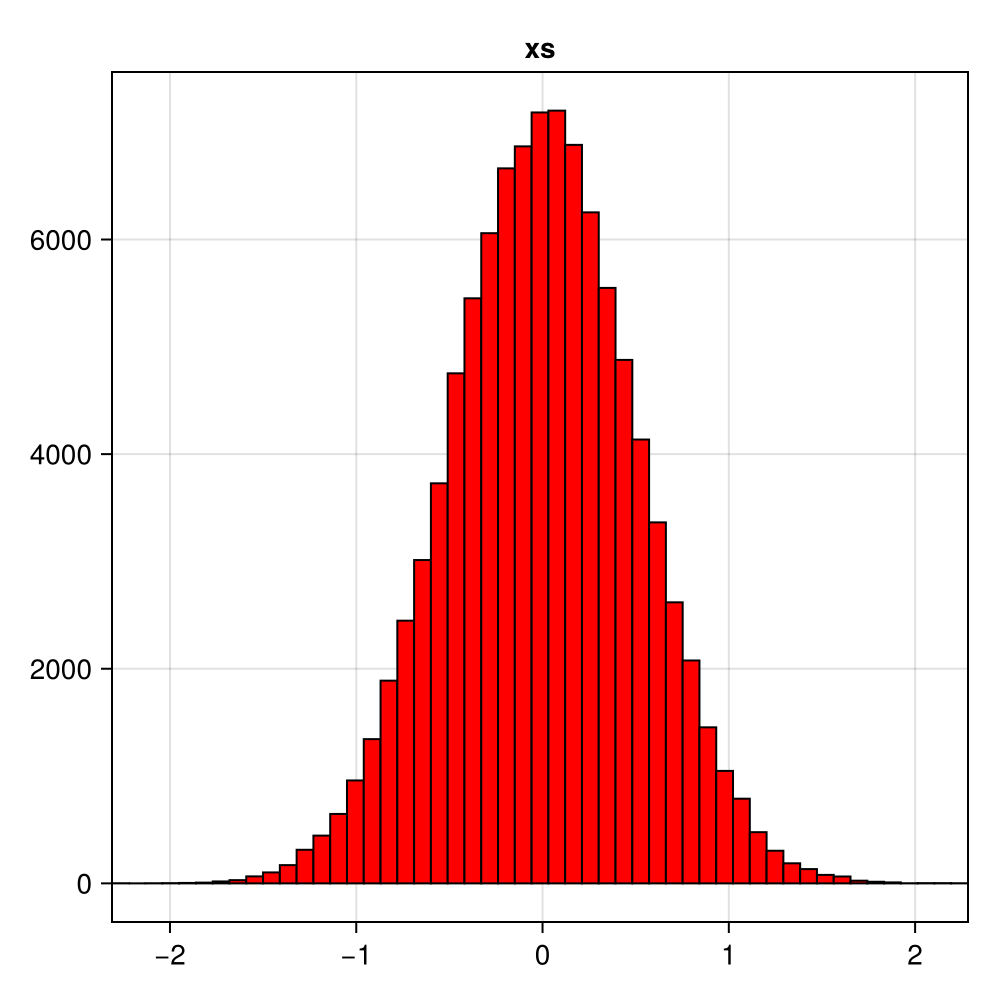

In [47]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in states]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f